In [1]:
%load_ext autoreload
%autoreload 2

### Dataset

In [2]:
import tqdm
import numpy
import torchvision
import torchvision.transforms.v2

train = torchvision.datasets.CIFAR10('cifar-10', train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in tqdm.tqdm(train) ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) for item in tqdm.tqdm(test) ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

100%|██████████| 10000/10000 [00:00<00:00, 47504.92it/s]


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
print(train_images.min(), train_images.max())
train_images = train_images[:, :, :, 0] + 256 * train_images[:, :, :, 1] + 256 * 256 * train_images[:, :, :, 2]
print(train_images.min(), train_images.max())

print(test_images.min(), test_images.max())
test_images = test_images[:, :, :, 0] + 256 * test_images[:, :, :, 1] + 256 * 256 * test_images[:, :, :, 2]
print(test_images.min(), test_images.max())

0 255
0 16777215
0 255
0 16777215


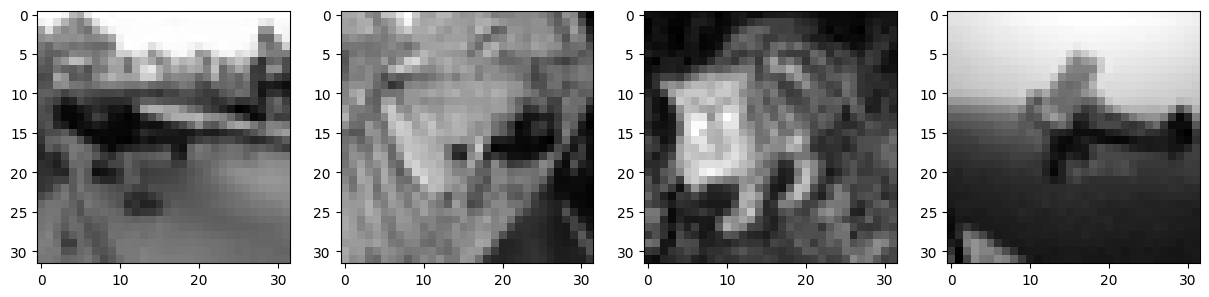

In [4]:
import matplotlib.pyplot as plt

OBJECT = 5477

figure, axes = plt.subplots(1, 4, figsize = (15, 5))
axes[0].imshow(train_images[5477], cmap = 'gray')
axes[1].imshow(train_images[235], cmap = 'gray')
axes[2].imshow(train_images[45778], cmap = 'gray')
axes[3].imshow(train_images[1234], cmap = 'gray')

### Features

In [9]:
import os
import cvtda.topology

def make_features(name: str, binarizer, filtration):
    if os.path.exists(f"7/{name}/test_features.npy"):
        return
    
    train = train_images.copy()
    test = test_images.copy()

    if binarizer is not None:
        train = binarizer.fit_transform(train)
        test = binarizer.transform(test)
        
    if filtration is not None:
        train = filtration.fit_transform(train)
        test = filtration.transform(test)

    filtrations_to_diagrams = cvtda.topology.FiltrationsToDiagrams(homology_dimensions = [ 0, 1 ])
    train = filtrations_to_diagrams.fit_transform(train)
    test = filtrations_to_diagrams.transform(test)
    print(train.shape, test.shape)

    n_bins = (64 if len(train[0]) < 256 else 128)
    print(f"Bins: {n_bins}")
    digrams_to_features = cvtda.topology.DiagramsToFeatures(batch_size = 625, n_bins = n_bins)
    train = digrams_to_features.fit_transform(train)
    test = digrams_to_features.transform(test)
    print(train.shape, test.shape)

    os.makedirs(f"7/{name}", exist_ok = True)
    numpy.save(f"7/{name}/train_features.npy", train)
    numpy.save(f"7/{name}/test_features.npy", test)


In [6]:
make_features("raw", binarizer = None, filtration = None)

Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5030.64it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6108.87it/s]


(50000, 277, 3) (10000, 225, 3)
Bins: 128
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:01<00:00,  1.26it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]


Fitting complete


Batch:   1%|▏         | 1/80 [00:18<24:22, 18.51s/it]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Batch: 100%|██████████| 16/16 [00:16<00:00,  1.03s/it]

(50000, 260) (10000, 260)


In [10]:
import itertools
import gtda.images

greyscale_to_filtrations = cvtda.topology.GreyscaleToFiltrations(
    binarizer_threshold = 0.4,
    radial_filtration_centers = list(itertools.product([ 3, 8, 13, 18, 23, 28 ], [ 3, 8, 13, 18, 23, 28 ]))
)
for i, filtration in enumerate(greyscale_to_filtrations.filtrations_):
    print(f"{i}/{len(greyscale_to_filtrations.filtrations_)}). {filtration}")
    make_features(
        f"{type(filtration).__name__}{i}",
        binarizer = gtda.images.Binarizer(threshold = 0.4),
        filtration = filtration
    )

0/49). HeightFiltration(direction=array([-1, -1]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4899.26it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6125.89it/s]


(50000, 96, 3) (10000, 89, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


Fitting complete


Batch:   0%|          | 0/80 [00:00<?, ?it/s]d:\Programs\Programming\Python\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Batch: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


(50000, 260) (10000, 260)
1/49). HeightFiltration(direction=array([1, 1]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5059.55it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6079.42it/s]


(50000, 97, 3) (10000, 86, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]


(50000, 260) (10000, 260)
2/49). HeightFiltration(direction=array([ 1, -1]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4698.24it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6180.70it/s]


(50000, 98, 3) (10000, 86, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]


(50000, 260) (10000, 260)
3/49). HeightFiltration(direction=array([-1,  1]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4617.05it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6087.68it/s]


(50000, 96, 3) (10000, 87, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]


(50000, 260) (10000, 260)
4/49). HeightFiltration(direction=array([ 0, -1]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4253.52it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5519.60it/s]


(50000, 96, 3) (10000, 85, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]


(50000, 260) (10000, 260)
5/49). HeightFiltration(direction=array([0, 1]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4804.65it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5838.58it/s]


(50000, 97, 3) (10000, 83, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.30it/s]


(50000, 260) (10000, 260)
6/49). HeightFiltration(direction=array([-1,  0]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4793.10it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5709.85it/s]


(50000, 99, 3) (10000, 86, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.32it/s]


(50000, 260) (10000, 260)
7/49). HeightFiltration(direction=array([1, 0]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4930.19it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6093.79it/s]


(50000, 97, 3) (10000, 88, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.36it/s]


(50000, 260) (10000, 260)
8/49). RadialFiltration(center=array([3, 3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:08<00:00, 5591.19it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6727.20it/s]


(50000, 100, 3) (10000, 89, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  2.91it/s]


(50000, 260) (10000, 260)
9/49). RadialFiltration(center=array([3, 8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4852.67it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6183.44it/s]


(50000, 102, 3) (10000, 92, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.38it/s]


(50000, 260) (10000, 260)
10/49). RadialFiltration(center=array([ 3, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5486.37it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6639.35it/s]


(50000, 105, 3) (10000, 93, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.30it/s]


(50000, 260) (10000, 260)
11/49). RadialFiltration(center=array([ 3, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5286.61it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6529.48it/s]


(50000, 103, 3) (10000, 92, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]


(50000, 260) (10000, 260)
12/49). RadialFiltration(center=array([ 3, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5515.49it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6871.55it/s]


(50000, 100, 3) (10000, 90, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.40it/s]


(50000, 260) (10000, 260)
13/49). RadialFiltration(center=array([ 3, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:08<00:00, 5591.88it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6622.23it/s]


(50000, 99, 3) (10000, 88, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.48it/s]


(50000, 260) (10000, 260)
14/49). RadialFiltration(center=array([8, 3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5279.30it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6203.76it/s]


(50000, 101, 3) (10000, 92, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]


(50000, 260) (10000, 260)
15/49). RadialFiltration(center=array([8, 8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4910.94it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5734.96it/s]


(50000, 101, 3) (10000, 91, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]


(50000, 260) (10000, 260)
16/49). RadialFiltration(center=array([ 8, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5491.90it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6673.70it/s]


(50000, 103, 3) (10000, 94, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.31it/s]


(50000, 260) (10000, 260)
17/49). RadialFiltration(center=array([ 8, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5352.16it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6638.81it/s]


(50000, 102, 3) (10000, 92, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.10it/s]


(50000, 260) (10000, 260)
18/49). RadialFiltration(center=array([ 8, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5435.31it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6638.64it/s]


(50000, 101, 3) (10000, 90, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  2.69it/s]


(50000, 260) (10000, 260)
19/49). RadialFiltration(center=array([ 8, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5453.17it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6613.20it/s]


(50000, 101, 3) (10000, 90, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]


(50000, 260) (10000, 260)
20/49). RadialFiltration(center=array([13,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5260.65it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6286.69it/s]


(50000, 100, 3) (10000, 94, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.22it/s]


(50000, 260) (10000, 260)
21/49). RadialFiltration(center=array([13,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5167.81it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6169.62it/s]


(50000, 100, 3) (10000, 91, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.17it/s]


(50000, 260) (10000, 260)
22/49). RadialFiltration(center=array([13, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5188.45it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6279.45it/s]


(50000, 102, 3) (10000, 91, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.11it/s]


(50000, 260) (10000, 260)
23/49). RadialFiltration(center=array([13, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5365.27it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6469.00it/s]


(50000, 100, 3) (10000, 91, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.04it/s]


(50000, 260) (10000, 260)
24/49). RadialFiltration(center=array([13, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5391.37it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6413.46it/s]


(50000, 104, 3) (10000, 91, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]


(50000, 260) (10000, 260)
25/49). RadialFiltration(center=array([13, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5363.11it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6501.30it/s]


(50000, 104, 3) (10000, 91, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]


(50000, 260) (10000, 260)
26/49). RadialFiltration(center=array([18,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5385.81it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6717.40it/s]


(50000, 100, 3) (10000, 90, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.16it/s]


(50000, 260) (10000, 260)
27/49). RadialFiltration(center=array([18,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5306.60it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6537.87it/s]


(50000, 101, 3) (10000, 90, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.21it/s]


(50000, 260) (10000, 260)
28/49). RadialFiltration(center=array([18, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5266.29it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6494.04it/s]


(50000, 101, 3) (10000, 89, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]


(50000, 260) (10000, 260)
29/49). RadialFiltration(center=array([18, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5065.70it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6110.96it/s]


(50000, 101, 3) (10000, 91, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.02it/s]


(50000, 260) (10000, 260)
30/49). RadialFiltration(center=array([18, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5246.32it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6497.75it/s]


(50000, 102, 3) (10000, 91, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.04it/s]


(50000, 260) (10000, 260)
31/49). RadialFiltration(center=array([18, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5434.05it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 7140.81it/s]


(50000, 104, 3) (10000, 89, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.37it/s]


(50000, 260) (10000, 260)
32/49). RadialFiltration(center=array([23,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5489.19it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6905.71it/s]


(50000, 101, 3) (10000, 88, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.41it/s]


(50000, 260) (10000, 260)
33/49). RadialFiltration(center=array([23,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5472.21it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6679.93it/s]


(50000, 99, 3) (10000, 88, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.33it/s]


(50000, 260) (10000, 260)
34/49). RadialFiltration(center=array([23, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5427.85it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6690.54it/s]


(50000, 101, 3) (10000, 87, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]


(50000, 260) (10000, 260)
35/49). RadialFiltration(center=array([23, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5488.72it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6731.96it/s]


(50000, 100, 3) (10000, 87, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.34it/s]


(50000, 260) (10000, 260)
36/49). RadialFiltration(center=array([23, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5481.02it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6428.90it/s]


(50000, 102, 3) (10000, 87, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.30it/s]


(50000, 260) (10000, 260)
37/49). RadialFiltration(center=array([23, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5540.19it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6327.62it/s]


(50000, 106, 3) (10000, 89, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.08it/s]


(50000, 260) (10000, 260)
38/49). RadialFiltration(center=array([28,  3]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4811.80it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6618.48it/s]


(50000, 100, 3) (10000, 89, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.08it/s]


(50000, 260) (10000, 260)
39/49). RadialFiltration(center=array([28,  8]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5530.79it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6607.23it/s]


(50000, 99, 3) (10000, 87, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.26it/s]


(50000, 260) (10000, 260)
40/49). RadialFiltration(center=array([28, 13]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5528.37it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6847.29it/s]


(50000, 100, 3) (10000, 88, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.12it/s]


(50000, 260) (10000, 260)
41/49). RadialFiltration(center=array([28, 18]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5491.88it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6724.97it/s]


(50000, 100, 3) (10000, 88, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  3.20it/s]


(50000, 260) (10000, 260)
42/49). RadialFiltration(center=array([28, 23]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5518.92it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5825.03it/s]


(50000, 100, 3) (10000, 89, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:05<00:00,  2.95it/s]


(50000, 260) (10000, 260)
43/49). RadialFiltration(center=array([28, 28]), n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:09<00:00, 5528.77it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6554.09it/s]


(50000, 102, 3) (10000, 89, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]


(50000, 260) (10000, 260)
44/49). DilationFiltration(n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4455.77it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5419.27it/s]


(50000, 94, 3) (10000, 85, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.23it/s]


(50000, 260) (10000, 260)
45/49). ErosionFiltration(n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:11<00:00, 4358.79it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:02<00:00, 4008.74it/s]


(50000, 91, 3) (10000, 86, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.25it/s]


(50000, 260) (10000, 260)
46/49). SignedDistanceFiltration(n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4714.36it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5929.57it/s]


(50000, 94, 3) (10000, 94, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]


(50000, 260) (10000, 260)
47/49). DensityFiltration(n_jobs=-1, radius=1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4606.93it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 5631.83it/s]


(50000, 92, 3) (10000, 78, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:07<00:00,  2.05it/s]


(50000, 260) (10000, 260)
48/49). DensityFiltration(n_jobs=-1)
Fitting the persistence
Fitting complete
Calculating the persistence


100%|██████████| 50000/50000 [00:10<00:00, 4976.27it/s]


Calculating the persistence


100%|██████████| 10000/10000 [00:01<00:00, 6134.49it/s]


(50000, 69, 3) (10000, 87, 3)
Bins: 64
Fitting the calculator
Fitting the filtering
Fitting the betti curve
Fitting the persistence landscape


Fitting the silhouettes: 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]


Fitting the persistence entropy
Fitting the number of points


Fitting the persistence images: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]


Fitting complete


Batch: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]


(50000, 260) (10000, 260)


In [11]:
import os

train_features = numpy.hstack([
    numpy.load(f"7/{folder}/train_features.npy")
    for folder in os.listdir("7")
])

test_features = numpy.hstack([
    numpy.load(f"7/{folder}/test_features.npy")
    for folder in os.listdir("7")
])

train_features.shape, test_features.shape

((50000, 13000), (10000, 13000))

In [12]:
train_features.min(), train_features.max()

(-120.0, 1382355734.5)

### Classify raw features

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.293, 'TOP-2 Accuracy': 0.4696, 'TOP-3 Accuracy': 0.5942, 'TOP-4 Accuracy': 0.6941, 'TOP-5 Accuracy': 0.7739, 'TOP-6 Accuracy': 0.8385, 'TOP-7 Accuracy': 0.8934, 'TOP-8 Accuracy': 0.9384, 'TOP-9 Accuracy': 0.976, 'AUC-ROC': 0.7308720499999999, 'Precision': 0.2829182997380234, 'Recall': 0.29300000000000004, 'F1-score': 0.28370051688397757}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4083, 'TOP-2 Accuracy': 0.5921, 'TOP-3 Accuracy': 0.7108, 'TOP-4 Accuracy': 0.79, 'TOP-5 Accuracy': 0.8481, 'TOP-6 Accuracy': 0.8977, 'TOP-7 Accuracy': 0.935, 'TOP-8 Accuracy': 0.9633, 'TOP-9 Accuracy': 0.9854, 'AUC-ROC': 0.8149081055555556, 'Precision': 0.3991003749970399, 'Recall': 0.4083, 'F1-score': 0.4002971044674995}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026BFEBC4850>
Input to LazyLinear: 1300

100%|██████████| 25/25 [00:57<00:00,  2.32s/it, loss=1.09e+5, val_acc=0.262]


{'classifier': 'NNClassifier', 'Accuracy': 0.2617, 'TOP-2 Accuracy': 0.4301, 'TOP-3 Accuracy': 0.558, 'TOP-4 Accuracy': 0.6638, 'TOP-5 Accuracy': 0.7573, 'TOP-6 Accuracy': 0.8335, 'TOP-7 Accuracy': 0.8903, 'TOP-8 Accuracy': 0.9344, 'TOP-9 Accuracy': 0.9676, 'AUC-ROC': 0.7059414166666667, 'Precision': 0.3094031836770773, 'Recall': 0.2617, 'F1-score': 0.2473317531891956}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4163, 'TOP-2 Accuracy': 0.6195, 'TOP-3 Accuracy': 0.7374, 'TOP-4 Accuracy': 0.815, 'TOP-5 Accuracy': 0.8737, 'TOP-6 Accuracy': 0.9178, 'TOP-7 Accuracy': 0.9503, 'TOP-8 Accuracy': 0.9763, 'TOP-9 Accuracy': 0.9908, 'AUC-ROC': 0.8322721000000002, 'Precision': 0.4092966046971803, 'Recall': 0.4163, 'F1-score': 0.40876634609662094}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026BFEBC4E50>
Learning rate set to 0.309284
0:	l

d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [15:43:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


{'classifier': 'XGBClassifier', 'Accuracy': 0.4427, 'TOP-2 Accuracy': 0.6415, 'TOP-3 Accuracy': 0.7598, 'TOP-4 Accuracy': 0.8342, 'TOP-5 Accuracy': 0.8923, 'TOP-6 Accuracy': 0.9344, 'TOP-7 Accuracy': 0.9598, 'TOP-8 Accuracy': 0.9792, 'TOP-9 Accuracy': 0.9924, 'AUC-ROC': 0.8481118333333332, 'Precision': 0.43551548159558173, 'Recall': 0.44270000000000004, 'F1-score': 0.4364532254704715}


,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.2930,0.4696,0.5942,0.6941,0.7739,0.8385,0.8934,0.9384,0.9760,0.730872,0.282918,0.2930,0.283701
1,RandomForestClassifier,0.4083,0.5921,0.7108,0.7900,0.8481,0.8977,0.9350,0.9633,0.9854,0.814908,0.399100,0.4083,0.400297
2,NNClassifier,0.2617,0.4301,0.5580,0.6638,0.7573,0.8335,0.8903,0.9344,0.9676,0.705941,0.309403,0.2617,0.247332
3,HistGradientBoostingClassifier,0.4163,0.6195,0.7374,0.8150,0.8737,0.9178,0.9503,0.9763,0.9908,0.832272,0.409297,0.4163,0.408766
4,CatBoostClassifier,0.4835,0.6836,0.7991,0.8628,0.9135,0.9466,0.9688,0.9859,0.9953,0.872370,0.477308,0.4835,0.479337
5,XGBClassifier,0.4427,0.6415,0.7598,0.8342,0.8923,0.9344,0.9598,0.9792,0.9924,0.848112,0.435515,0.4427,0.436453


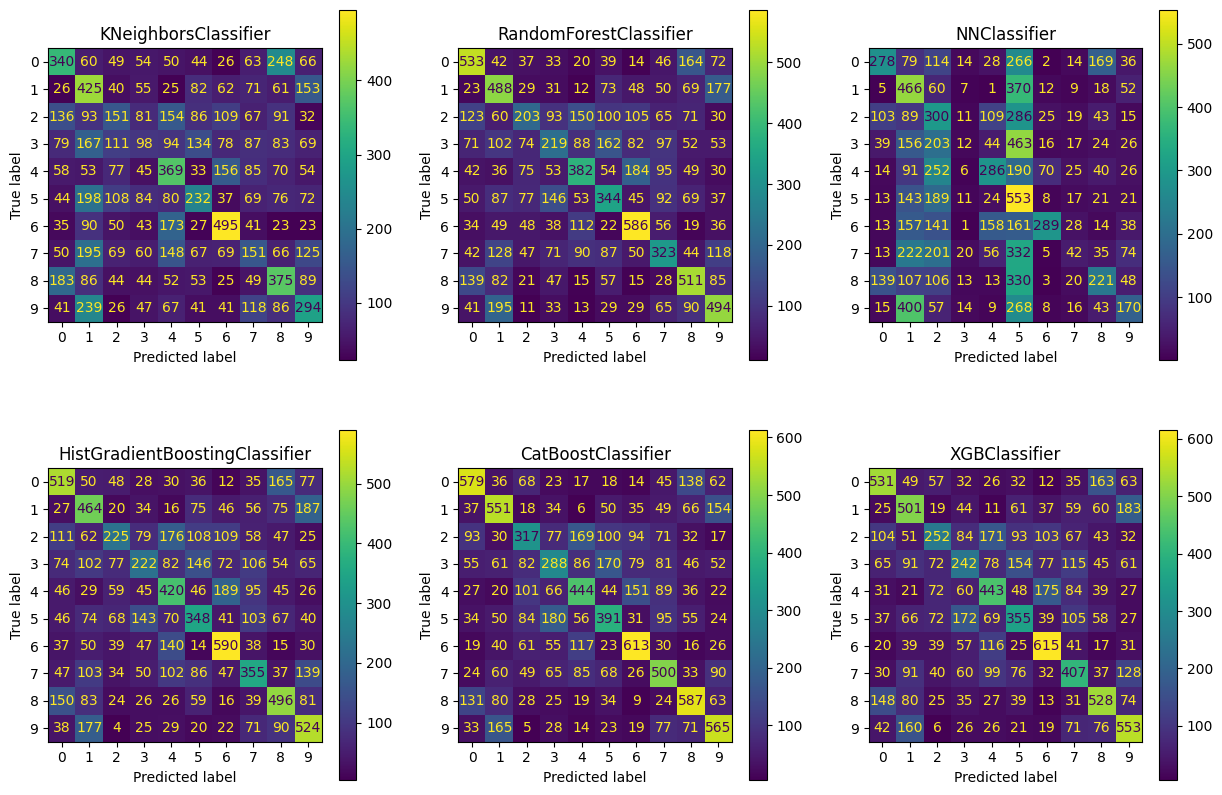

In [13]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### StandardScaler

In [14]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

train_features.shape, test_features.shape

((50000, 13000), (10000, 13000))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3244, 'TOP-2 Accuracy': 0.5195, 'TOP-3 Accuracy': 0.6408, 'TOP-4 Accuracy': 0.7305, 'TOP-5 Accuracy': 0.803, 'TOP-6 Accuracy': 0.8613, 'TOP-7 Accuracy': 0.9066, 'TOP-8 Accuracy': 0.9469, 'TOP-9 Accuracy': 0.9758, 'AUC-ROC': 0.7658405722222222, 'Precision': 0.3188616653164914, 'Recall': 0.32439999999999997, 'F1-score': 0.31117594189945563}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4089, 'TOP-2 Accuracy': 0.5986, 'TOP-3 Accuracy': 0.7139, 'TOP-4 Accuracy': 0.7919, 'TOP-5 Accuracy': 0.8486, 'TOP-6 Accuracy': 0.8961, 'TOP-7 Accuracy': 0.9313, 'TOP-8 Accuracy': 0.9637, 'TOP-9 Accuracy': 0.985, 'AUC-ROC': 0.8184455611111112, 'Precision': 0.4009817689109851, 'Recall': 0.40889999999999993, 'F1-score': 0.401772203661601}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026BA27CD540>
Input to L

100%|██████████| 25/25 [00:58<00:00,  2.33s/it, loss=9.99e+4, val_acc=0.458]


{'classifier': 'NNClassifier', 'Accuracy': 0.4582, 'TOP-2 Accuracy': 0.6631, 'TOP-3 Accuracy': 0.7667, 'TOP-4 Accuracy': 0.8323, 'TOP-5 Accuracy': 0.883, 'TOP-6 Accuracy': 0.9168, 'TOP-7 Accuracy': 0.9465, 'TOP-8 Accuracy': 0.9704, 'TOP-9 Accuracy': 0.9872, 'AUC-ROC': 0.8334311166666667, 'Precision': 0.4466927001533138, 'Recall': 0.45820000000000005, 'F1-score': 0.44812236764905444}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4154, 'TOP-2 Accuracy': 0.6165, 'TOP-3 Accuracy': 0.7352, 'TOP-4 Accuracy': 0.8126, 'TOP-5 Accuracy': 0.8741, 'TOP-6 Accuracy': 0.9191, 'TOP-7 Accuracy': 0.9523, 'TOP-8 Accuracy': 0.9768, 'TOP-9 Accuracy': 0.991, 'AUC-ROC': 0.8324795555555556, 'Precision': 0.4083872801932042, 'Recall': 0.4154, 'F1-score': 0.40780220110647464}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026BFEFF5810>
Learning rate set to

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3244,0.5195,0.6408,0.7305,0.8030,0.8613,0.9066,0.9469,0.9758,0.765841,0.318862,0.3244,0.311176
1,RandomForestClassifier,0.4089,0.5986,0.7139,0.7919,0.8486,0.8961,0.9313,0.9637,0.9850,0.818446,0.400982,0.4089,0.401772
2,NNClassifier,0.4582,0.6631,0.7667,0.8323,0.8830,0.9168,0.9465,0.9704,0.9872,0.833431,0.446693,0.4582,0.448122
3,HistGradientBoostingClassifier,0.4154,0.6165,0.7352,0.8126,0.8741,0.9191,0.9523,0.9768,0.9910,0.832480,0.408387,0.4154,0.407802
4,CatBoostClassifier,0.4815,0.6833,0.7944,0.8654,0.9128,0.9464,0.9688,0.9843,0.9942,0.872410,0.475166,0.4815,0.476964
5,XGBClassifier,0.4426,0.6411,0.7573,0.8353,0.8887,0.9323,0.9598,0.9801,0.9917,0.847280,0.436008,0.4426,0.436880


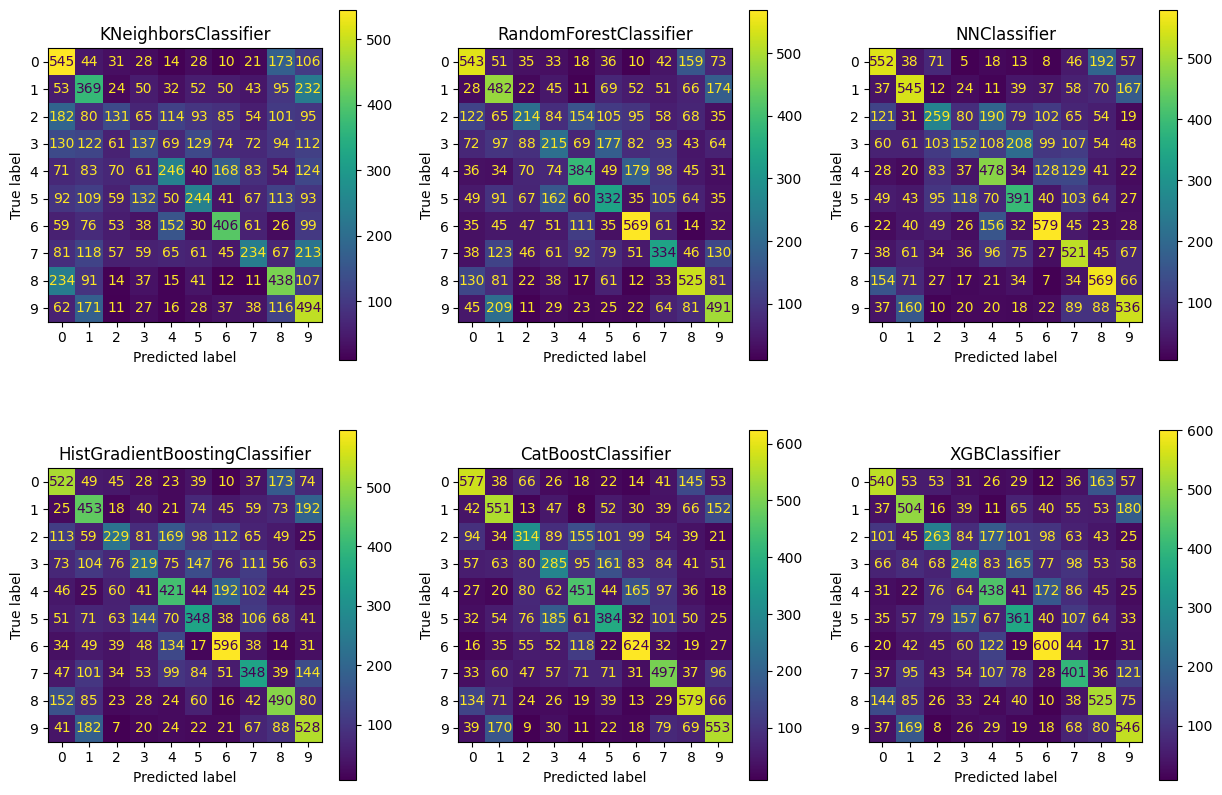

In [15]:
import cvtda.classification

cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### VarianceThreshold & DuplicatesRemover

In [16]:
import sklearn.feature_selection

variance_threshold = sklearn.feature_selection.VarianceThreshold(threshold = 1e-8)
train_features = variance_threshold.fit_transform(train_features)
test_features = variance_threshold.transform(test_features)

train_features.shape, test_features.shape

((50000, 12433), (10000, 12433))

In [17]:
import cvtda.utils

duplicates_remover = cvtda.utils.DuplicateFeaturesRemover()
train_features = duplicates_remover.fit_transform(train_features)
test_features = duplicates_remover.transform(test_features)

train_features.shape, test_features.shape

100%|██████████| 7919/7919 [00:22<00:00, 355.62it/s, partition_by=0, num_features=3, duplicates=4699] 


Found 4701 duplicates


((50000, 7732), (10000, 7732))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3223, 'TOP-2 Accuracy': 0.5186, 'TOP-3 Accuracy': 0.6399, 'TOP-4 Accuracy': 0.7281, 'TOP-5 Accuracy': 0.8061, 'TOP-6 Accuracy': 0.8659, 'TOP-7 Accuracy': 0.9104, 'TOP-8 Accuracy': 0.9479, 'TOP-9 Accuracy': 0.9753, 'AUC-ROC': 0.7661064833333333, 'Precision': 0.31760197273158536, 'Recall': 0.3223, 'F1-score': 0.3101021794640285}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4074, 'TOP-2 Accuracy': 0.5979, 'TOP-3 Accuracy': 0.7115, 'TOP-4 Accuracy': 0.7932, 'TOP-5 Accuracy': 0.8539, 'TOP-6 Accuracy': 0.901, 'TOP-7 Accuracy': 0.9387, 'TOP-8 Accuracy': 0.9652, 'TOP-9 Accuracy': 0.9857, 'AUC-ROC': 0.8173824166666666, 'Precision': 0.39891413134821, 'Recall': 0.4074, 'F1-score': 0.3997022419615392}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026C4608DC90>
Input to LazyLinear: 7732
Parameters

100%|██████████| 25/25 [02:22<00:00,  5.71s/it, loss=1e+5, val_acc=0.459]   


{'classifier': 'NNClassifier', 'Accuracy': 0.4588, 'TOP-2 Accuracy': 0.6579, 'TOP-3 Accuracy': 0.7615, 'TOP-4 Accuracy': 0.833, 'TOP-5 Accuracy': 0.8845, 'TOP-6 Accuracy': 0.922, 'TOP-7 Accuracy': 0.9478, 'TOP-8 Accuracy': 0.9723, 'TOP-9 Accuracy': 0.9885, 'AUC-ROC': 0.8349915111111111, 'Precision': 0.4489754991974687, 'Recall': 0.4588, 'F1-score': 0.45034642892218574}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4136, 'TOP-2 Accuracy': 0.6198, 'TOP-3 Accuracy': 0.735, 'TOP-4 Accuracy': 0.8164, 'TOP-5 Accuracy': 0.8785, 'TOP-6 Accuracy': 0.9236, 'TOP-7 Accuracy': 0.9549, 'TOP-8 Accuracy': 0.9763, 'TOP-9 Accuracy': 0.9913, 'AUC-ROC': 0.8322591333333332, 'Precision': 0.4052560800933467, 'Recall': 0.4136, 'F1-score': 0.4048044596133414}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026BB5D6F160>
Learning rate set to 0.309284
0:	le

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3223,0.5186,0.6399,0.7281,0.8061,0.8659,0.9104,0.9479,0.9753,0.766106,0.317602,0.3223,0.310102
1,RandomForestClassifier,0.4074,0.5979,0.7115,0.7932,0.8539,0.9010,0.9387,0.9652,0.9857,0.817382,0.398914,0.4074,0.399702
2,NNClassifier,0.4588,0.6579,0.7615,0.8330,0.8845,0.9220,0.9478,0.9723,0.9885,0.834992,0.448975,0.4588,0.450346
3,HistGradientBoostingClassifier,0.4136,0.6198,0.7350,0.8164,0.8785,0.9236,0.9549,0.9763,0.9913,0.832259,0.405256,0.4136,0.404804
4,CatBoostClassifier,0.4815,0.6833,0.7944,0.8654,0.9128,0.9464,0.9688,0.9843,0.9942,0.872410,0.475166,0.4815,0.476964
5,XGBClassifier,0.4426,0.6411,0.7573,0.8353,0.8887,0.9323,0.9598,0.9801,0.9917,0.847280,0.436008,0.4426,0.436880


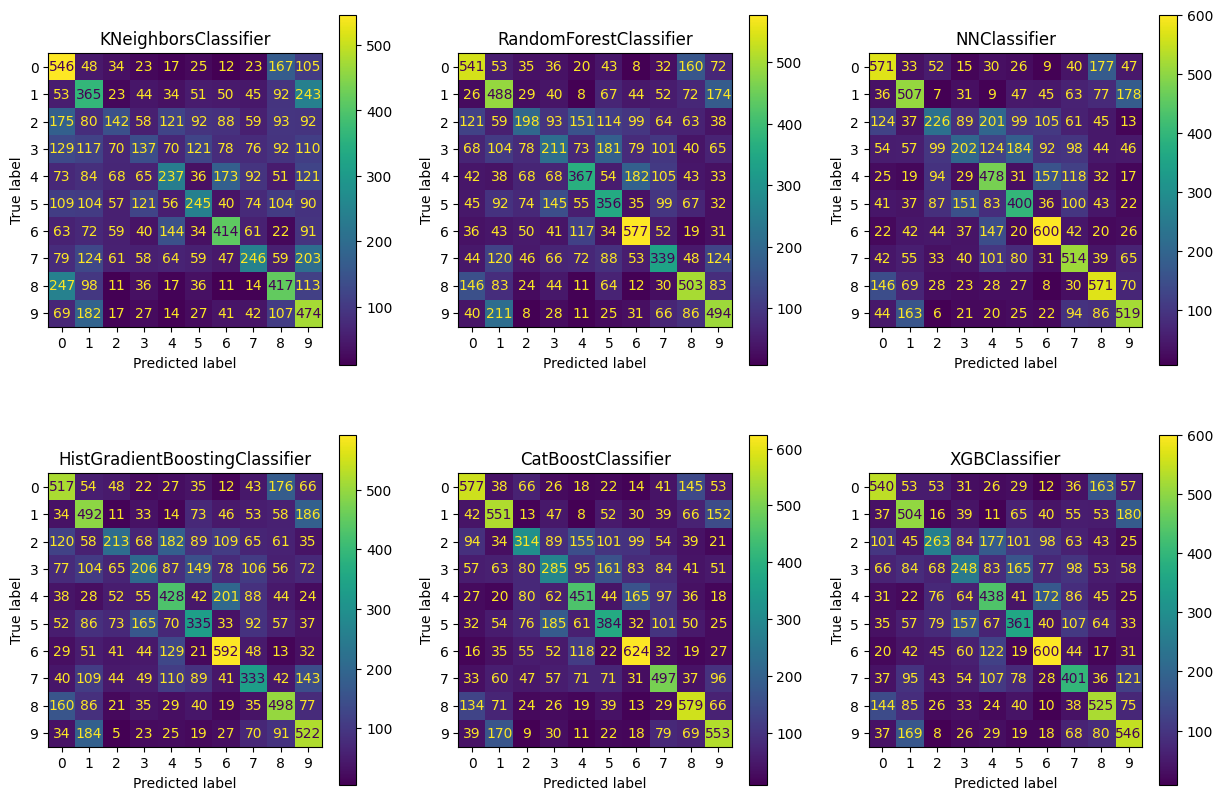

In [18]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### InformationValueFeatureSelector

Fitting the information value feature selector


information values: 100%|██████████| 7732/7732 [01:15<00:00, 102.83it/s]


Fitting complete


((50000, 5997), (10000, 5997))

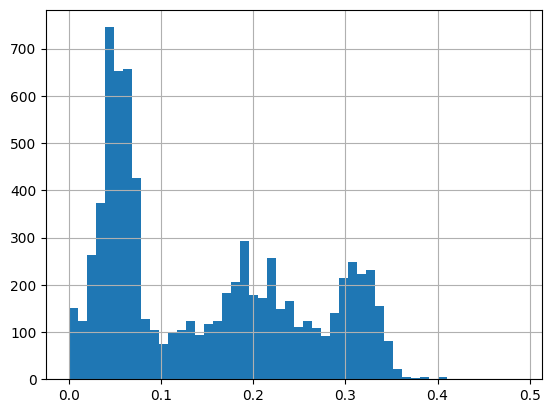

In [20]:
import cvtda.classification

feature_selector = cvtda.classification.InformationValueFeatureSelector(threshold = 0.05, bins = 50)

train_features = feature_selector.fit_transform(train_features, train_labels)
test_features = feature_selector.transform(test_features)

feature_selector.hist()

train_features.shape, test_features.shape

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3317, 'TOP-2 Accuracy': 0.5267, 'TOP-3 Accuracy': 0.6474, 'TOP-4 Accuracy': 0.7372, 'TOP-5 Accuracy': 0.8061, 'TOP-6 Accuracy': 0.8653, 'TOP-7 Accuracy': 0.9117, 'TOP-8 Accuracy': 0.9511, 'TOP-9 Accuracy': 0.9789, 'AUC-ROC': 0.7726990055555555, 'Precision': 0.32606906917405054, 'Recall': 0.3317, 'F1-score': 0.31883142450252216}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4152, 'TOP-2 Accuracy': 0.6092, 'TOP-3 Accuracy': 0.7179, 'TOP-4 Accuracy': 0.7976, 'TOP-5 Accuracy': 0.8537, 'TOP-6 Accuracy': 0.897, 'TOP-7 Accuracy': 0.933, 'TOP-8 Accuracy': 0.9643, 'TOP-9 Accuracy': 0.9848, 'AUC-ROC': 0.8186007055555555, 'Precision': 0.40744694711260665, 'Recall': 0.4152, 'F1-score': 0.4078900555654511}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026BA2FD2AD0>
Input to LazyLinear: 5997
Paramet

100%|██████████| 25/25 [01:55<00:00,  4.63s/it, loss=1.01e+5, val_acc=0.466]


{'classifier': 'NNClassifier', 'Accuracy': 0.4661, 'TOP-2 Accuracy': 0.6612, 'TOP-3 Accuracy': 0.7675, 'TOP-4 Accuracy': 0.8355, 'TOP-5 Accuracy': 0.8849, 'TOP-6 Accuracy': 0.9196, 'TOP-7 Accuracy': 0.9486, 'TOP-8 Accuracy': 0.9722, 'TOP-9 Accuracy': 0.9885, 'AUC-ROC': 0.8362888333333334, 'Precision': 0.4557057969112, 'Recall': 0.46609999999999996, 'F1-score': 0.4566280031507789}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4138, 'TOP-2 Accuracy': 0.6133, 'TOP-3 Accuracy': 0.7313, 'TOP-4 Accuracy': 0.8145, 'TOP-5 Accuracy': 0.8736, 'TOP-6 Accuracy': 0.9187, 'TOP-7 Accuracy': 0.9516, 'TOP-8 Accuracy': 0.9743, 'TOP-9 Accuracy': 0.9895, 'AUC-ROC': 0.8302694888888887, 'Precision': 0.4054839550266721, 'Recall': 0.4138, 'F1-score': 0.4058720121701705}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026BA2FD1EA0>
Learning rate set to 0.

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3317,0.5267,0.6474,0.7372,0.8061,0.8653,0.9117,0.9511,0.9789,0.772699,0.326069,0.3317,0.318831
1,RandomForestClassifier,0.4152,0.6092,0.7179,0.7976,0.8537,0.8970,0.9330,0.9643,0.9848,0.818601,0.407447,0.4152,0.407890
2,NNClassifier,0.4661,0.6612,0.7675,0.8355,0.8849,0.9196,0.9486,0.9722,0.9885,0.836289,0.455706,0.4661,0.456628
3,HistGradientBoostingClassifier,0.4138,0.6133,0.7313,0.8145,0.8736,0.9187,0.9516,0.9743,0.9895,0.830269,0.405484,0.4138,0.405872
4,CatBoostClassifier,0.4818,0.6851,0.7960,0.8642,0.9140,0.9463,0.9693,0.9849,0.9940,0.873045,0.475500,0.4818,0.477657
5,XGBClassifier,0.4453,0.6449,0.7586,0.8362,0.8873,0.9316,0.9587,0.9794,0.9929,0.847204,0.438718,0.4453,0.439412


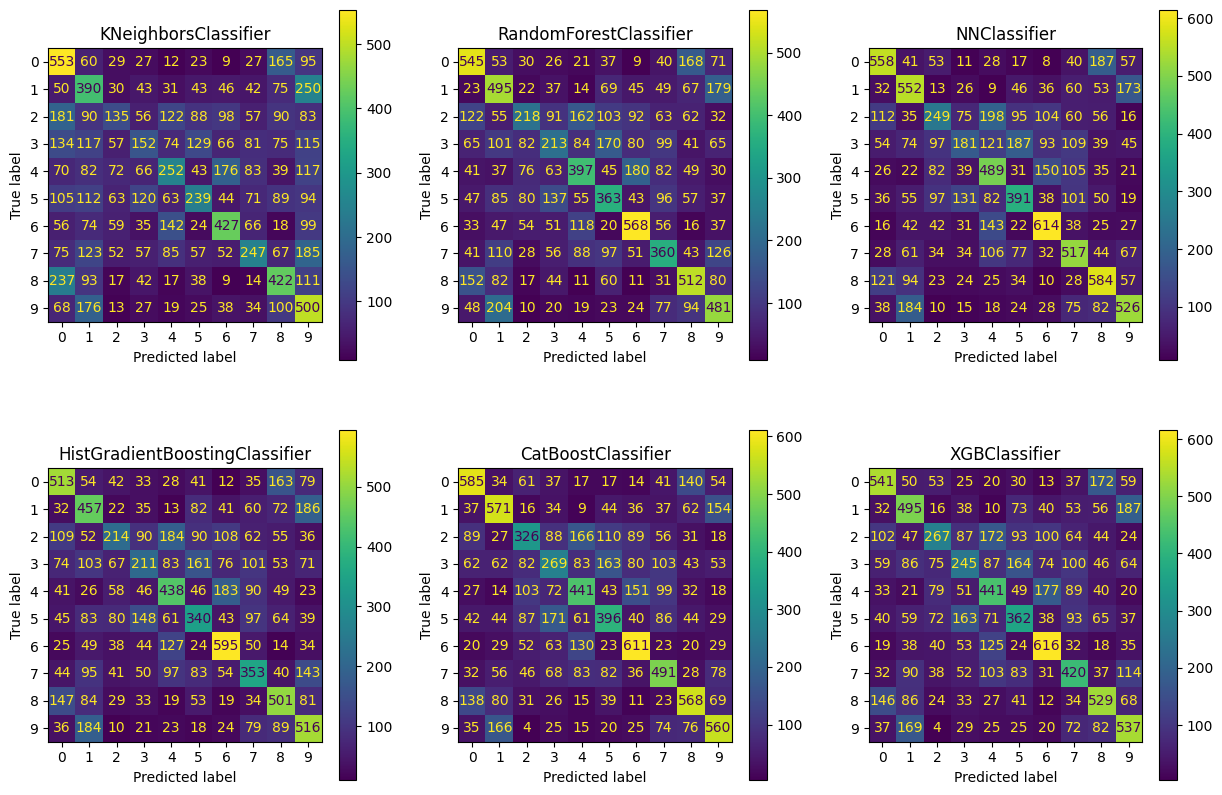

In [21]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### CorrelationSelector

Fitting the correlations feature selector
Fitting complete


((50000, 3437), (10000, 3437))

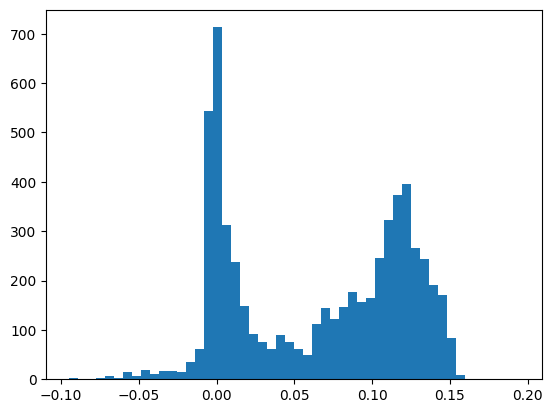

In [22]:
correlation_selector = cvtda.classification.CorrelationSelector(threshold = 0.05)

train_features = correlation_selector.fit_transform(train_features, train_labels)
test_features = correlation_selector.transform(test_features)

correlation_selector.hist()

train_features.shape, test_features.shape

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3281, 'TOP-2 Accuracy': 0.5111, 'TOP-3 Accuracy': 0.6332, 'TOP-4 Accuracy': 0.7205, 'TOP-5 Accuracy': 0.791, 'TOP-6 Accuracy': 0.8518, 'TOP-7 Accuracy': 0.9044, 'TOP-8 Accuracy': 0.9477, 'TOP-9 Accuracy': 0.9774, 'AUC-ROC': 0.7615164944444445, 'Precision': 0.3229936406730474, 'Recall': 0.32810000000000006, 'F1-score': 0.31688020385962556}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3906, 'TOP-2 Accuracy': 0.5826, 'TOP-3 Accuracy': 0.6943, 'TOP-4 Accuracy': 0.7731, 'TOP-5 Accuracy': 0.8357, 'TOP-6 Accuracy': 0.8871, 'TOP-7 Accuracy': 0.9299, 'TOP-8 Accuracy': 0.9607, 'TOP-9 Accuracy': 0.9828, 'AUC-ROC': 0.8031756055555556, 'Precision': 0.3823492439016348, 'Recall': 0.39059999999999995, 'F1-score': 0.38252018656531933}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026BA3014340>
Input t

100%|██████████| 25/25 [01:17<00:00,  3.12s/it, loss=1.03e+5, val_acc=0.427]


{'classifier': 'NNClassifier', 'Accuracy': 0.4275, 'TOP-2 Accuracy': 0.6411, 'TOP-3 Accuracy': 0.7489, 'TOP-4 Accuracy': 0.8217, 'TOP-5 Accuracy': 0.8743, 'TOP-6 Accuracy': 0.9136, 'TOP-7 Accuracy': 0.9462, 'TOP-8 Accuracy': 0.9696, 'TOP-9 Accuracy': 0.9856, 'AUC-ROC': 0.8221661222222221, 'Precision': 0.4176663198580292, 'Recall': 0.42750000000000005, 'F1-score': 0.4157793946599223}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.3951, 'TOP-2 Accuracy': 0.5962, 'TOP-3 Accuracy': 0.7196, 'TOP-4 Accuracy': 0.8002, 'TOP-5 Accuracy': 0.8613, 'TOP-6 Accuracy': 0.9131, 'TOP-7 Accuracy': 0.9467, 'TOP-8 Accuracy': 0.9741, 'TOP-9 Accuracy': 0.9905, 'AUC-ROC': 0.8202327111111111, 'Precision': 0.38538612828700175, 'Recall': 0.39509999999999995, 'F1-score': 0.38461613483059603}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026C45BFF130>
Learn

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3281,0.5111,0.6332,0.7205,0.7910,0.8518,0.9044,0.9477,0.9774,0.761516,0.322994,0.3281,0.316880
1,RandomForestClassifier,0.3906,0.5826,0.6943,0.7731,0.8357,0.8871,0.9299,0.9607,0.9828,0.803176,0.382349,0.3906,0.382520
2,NNClassifier,0.4275,0.6411,0.7489,0.8217,0.8743,0.9136,0.9462,0.9696,0.9856,0.822166,0.417666,0.4275,0.415779
3,HistGradientBoostingClassifier,0.3951,0.5962,0.7196,0.8002,0.8613,0.9131,0.9467,0.9741,0.9905,0.820233,0.385386,0.3951,0.384616
4,CatBoostClassifier,0.4651,0.6696,0.7814,0.8546,0.9013,0.9369,0.9606,0.9812,0.9920,0.862041,0.458271,0.4651,0.460474
5,XGBClassifier,0.4188,0.6253,0.7444,0.8236,0.8800,0.9237,0.9541,0.9755,0.9917,0.838294,0.409160,0.4188,0.410438


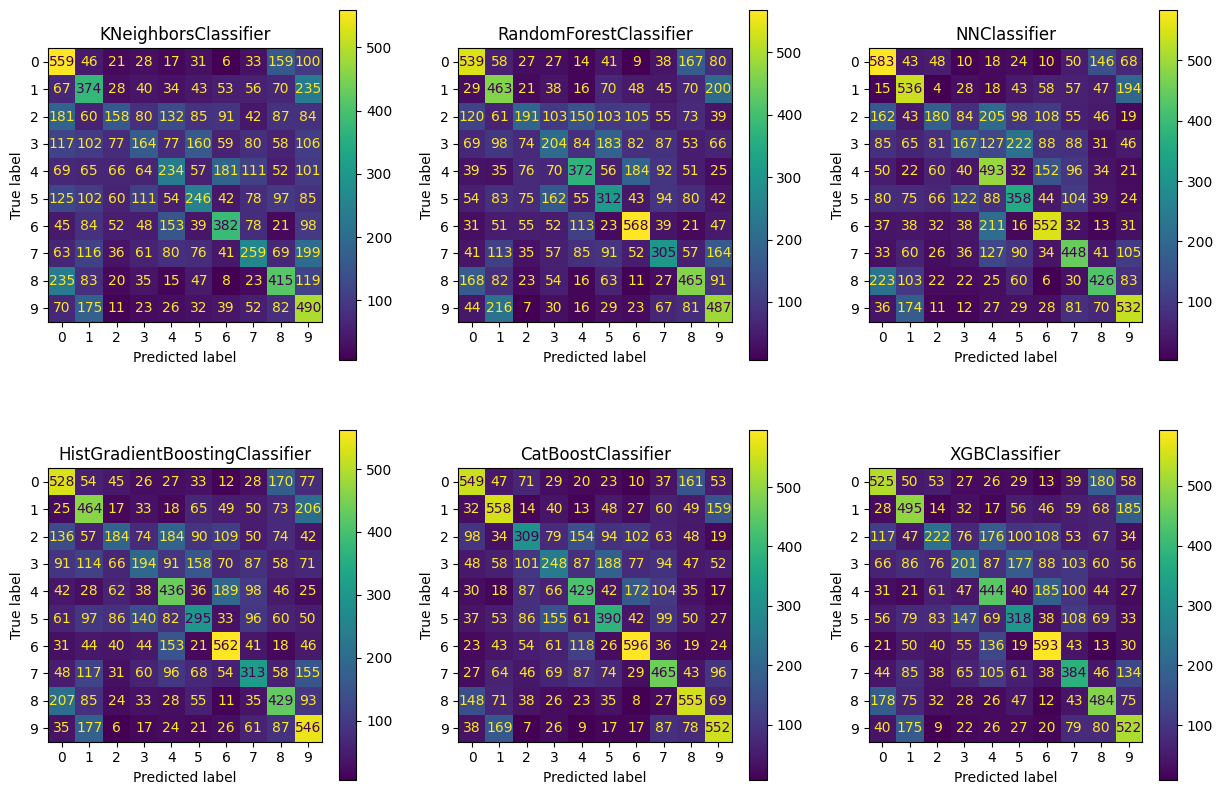

In [23]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)

### PCA

In [24]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components = 64, random_state = 42)

train_features = pca.fit_transform(train_features)
print('Explained variance', round(pca.explained_variance_ratio_.sum(), 2))
print([ round(x, 3) for x in pca.explained_variance_ratio_ ])

test_features = pca.transform(test_features)

train_features.shape, test_features.shape

Explained variance 0.94
[0.633, 0.08, 0.035, 0.029, 0.027, 0.015, 0.011, 0.008, 0.008, 0.006, 0.005, 0.005, 0.005, 0.005, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]


((50000, 64), (10000, 64))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3188, 'TOP-2 Accuracy': 0.5049, 'TOP-3 Accuracy': 0.6263, 'TOP-4 Accuracy': 0.7143, 'TOP-5 Accuracy': 0.7885, 'TOP-6 Accuracy': 0.8558, 'TOP-7 Accuracy': 0.905, 'TOP-8 Accuracy': 0.9458, 'TOP-9 Accuracy': 0.9765, 'AUC-ROC': 0.7579191666666667, 'Precision': 0.3117832806213368, 'Recall': 0.3188, 'F1-score': 0.30848343683716956}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.3597, 'TOP-2 Accuracy': 0.5489, 'TOP-3 Accuracy': 0.6649, 'TOP-4 Accuracy': 0.7538, 'TOP-5 Accuracy': 0.8252, 'TOP-6 Accuracy': 0.8762, 'TOP-7 Accuracy': 0.9209, 'TOP-8 Accuracy': 0.9547, 'TOP-9 Accuracy': 0.9817, 'AUC-ROC': 0.7839118833333335, 'Precision': 0.34994195130772565, 'Recall': 0.35969999999999996, 'F1-score': 0.351417831994301}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026C4501F2E0>
Input to LazyLinear: 

100%|██████████| 25/25 [00:30<00:00,  1.22s/it, loss=1.08e+5, val_acc=0.373]


{'classifier': 'NNClassifier', 'Accuracy': 0.3732, 'TOP-2 Accuracy': 0.5713, 'TOP-3 Accuracy': 0.6965, 'TOP-4 Accuracy': 0.7808, 'TOP-5 Accuracy': 0.8416, 'TOP-6 Accuracy': 0.8896, 'TOP-7 Accuracy': 0.9278, 'TOP-8 Accuracy': 0.9577, 'TOP-9 Accuracy': 0.9837, 'AUC-ROC': 0.7916011555555558, 'Precision': 0.36524308922218995, 'Recall': 0.37320000000000003, 'F1-score': 0.3584682744226489}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.3347, 'TOP-2 Accuracy': 0.531, 'TOP-3 Accuracy': 0.6533, 'TOP-4 Accuracy': 0.7487, 'TOP-5 Accuracy': 0.8213, 'TOP-6 Accuracy': 0.8792, 'TOP-7 Accuracy': 0.9234, 'TOP-8 Accuracy': 0.9586, 'TOP-9 Accuracy': 0.9817, 'AUC-ROC': 0.7774928222222223, 'Precision': 0.3251244004247456, 'Recall': 0.33469999999999994, 'F1-score': 0.32397423861717867}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026BB6C2C310>
Learni

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3188,0.5049,0.6263,0.7143,0.7885,0.8558,0.9050,0.9458,0.9765,0.757919,0.311783,0.3188,0.308483
1,RandomForestClassifier,0.3597,0.5489,0.6649,0.7538,0.8252,0.8762,0.9209,0.9547,0.9817,0.783912,0.349942,0.3597,0.351418
2,NNClassifier,0.3732,0.5713,0.6965,0.7808,0.8416,0.8896,0.9278,0.9577,0.9837,0.791601,0.365243,0.3732,0.358468
3,HistGradientBoostingClassifier,0.3347,0.5310,0.6533,0.7487,0.8213,0.8792,0.9234,0.9586,0.9817,0.777493,0.325124,0.3347,0.323974
4,CatBoostClassifier,0.4003,0.6070,0.7283,0.8114,0.8725,0.9169,0.9491,0.9726,0.9890,0.826097,0.392661,0.4003,0.395049
5,XGBClassifier,0.3588,0.5561,0.6855,0.7766,0.8436,0.8940,0.9359,0.9665,0.9860,0.798829,0.348436,0.3588,0.349525


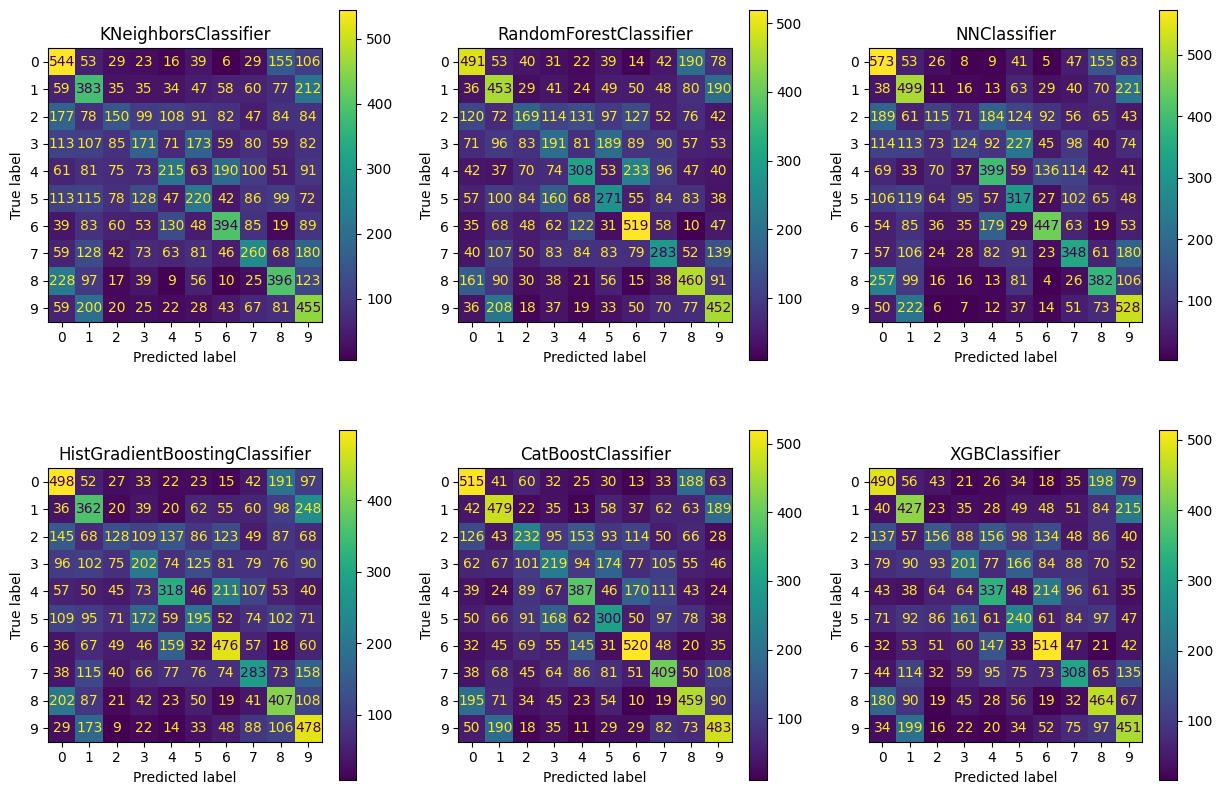

In [25]:
cvtda.classification.classify(
    train_features, train_labels, test_features, test_labels
)